In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)

# Exercise CLU

In [2]:
import pandas as pd

#import dataset
df = pd.read_csv("edlich-kmeans-A0.csv")
df

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


In [3]:
df.describe()

,V1,V2,V3
count,100.000000,100.000000,100.000000
mean,-0.731027,3.349859,0.046580
std,5.660510,4.219921,7.334466
min,-9.792300,-5.292139,-10.756151
25%,-5.193274,1.509583,-8.184790
50%,-1.690861,3.570038,3.630742
75%,4.840492,6.526973,5.113720
max,10.640624,10.772783,10.762034


In [4]:
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)

In [5]:
SumDistances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    SumDistances.append(km.inertia_)

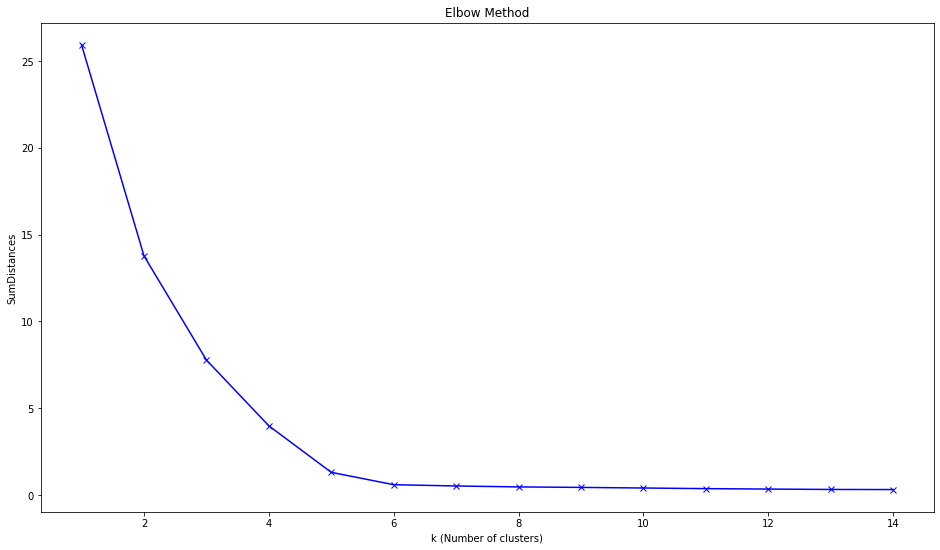

In [6]:
plt.plot(K, SumDistances, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('SumDistances')
plt.title('Elbow Method')
plt.show()

Aus dem Graphen ergibt sich ein optimales k = 5

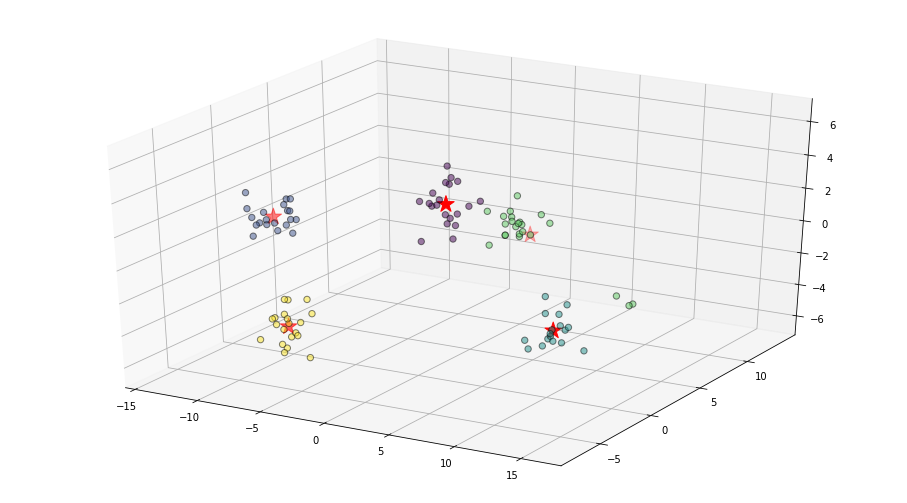

In [7]:
# Plot the clusters
from sklearn.decomposition import PCA
pca_ = PCA(n_components=3)
X = pca_.fit_transform(df)


kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= y_kmeans, cmap='viridis', edgecolor='k', s=40, alpha=0.5)
ax.dist=10

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=300, c='r', marker='*', label="Centeriod")

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()